# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

In [8]:
import scipy
from scipy.special import erf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Excercise 3.01

The aim of this exercise is to compute the price of a *Plain vanilla call-option* and a *put-option* using a Monte Carlo tecnique.
The parameters of the simulation are:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$

Market parameters used:
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

The price has to be calculeted first with a direct sampling of the final asset price $S(T)$ and than with a discretized *geometric brownian motion* simulation of the path of the asset price.
In both cases I compared the obtained results with the analitic solution of the problem provided by Black and Scholes method.

I produced the pictures of the estimations of the prices and their uncertainties using $M= 10^5$ asset prices, divided in $100$ blocks, as a function of the number of blocks.

In [9]:
# Analitic solution of the problem provided by Black and Scholes

# Parameters
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


#### (1) Sampling directly the final asset price S(T)

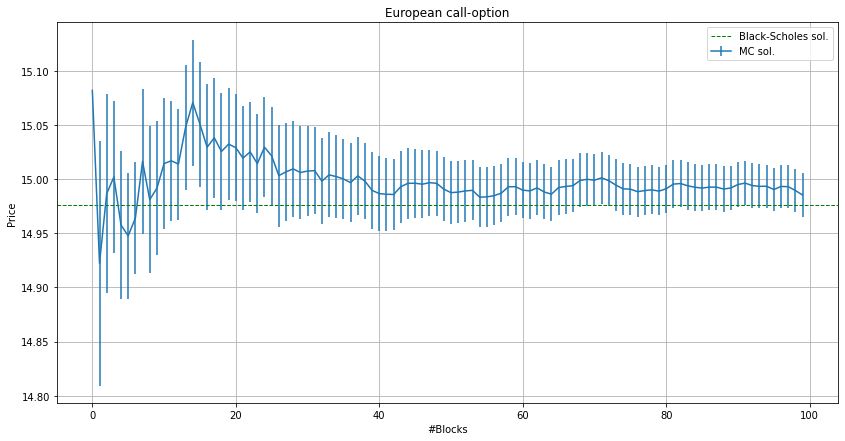

In [22]:
N = 100 # Number of blocks
prog_average_call_profit = np.loadtxt("../results/EX03_1(1).dat", usecols=0)
prog_error_call_profit = np.loadtxt("../results/EX03_1(1).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_call_profit, yerr=prog_error_call_profit, label='MC sol.')
plt.axhline(y=14.976, label='Black-Scholes sol.', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European call-option')
plt.xlabel('#Blocks')
plt.ylabel('Price')
plt.grid(True)

plt.show()

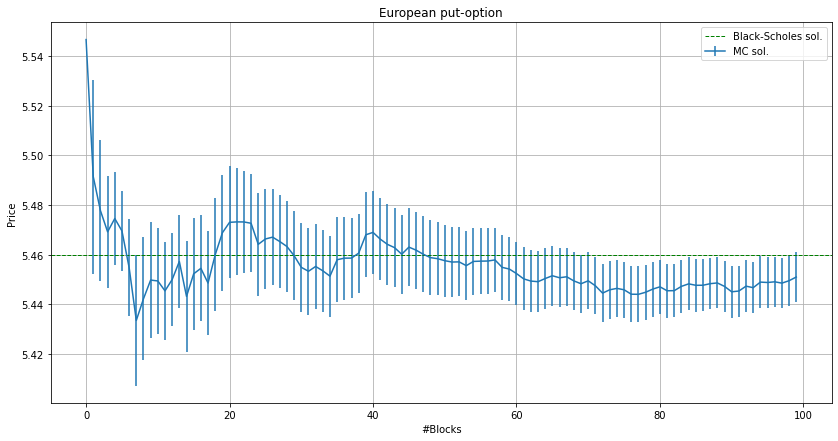

In [21]:
N = 100 # Number of blocks
prog_average_put_profit = np.loadtxt("../results/EX03_1(2).dat", usecols=0)
prog_error_put_profit = np.loadtxt("../results/EX03_1(2).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_put_profit, yerr=prog_error_put_profit, label='MC sol.')
plt.axhline(y=5.460, label='Black-Scholes sol.', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European put-option')
plt.xlabel('#Blocks')
plt.ylabel('Price')
plt.grid(True)

plt.show()

#### (2) Sampling the discretized $GBM(r,\sigma^2)$ path of the asset price

For the discretized sampling method I divided $[0,T]$ in $100$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$. Then, to price the option, I've considered the value of $S$ only at expiry time.
Results are shown below.

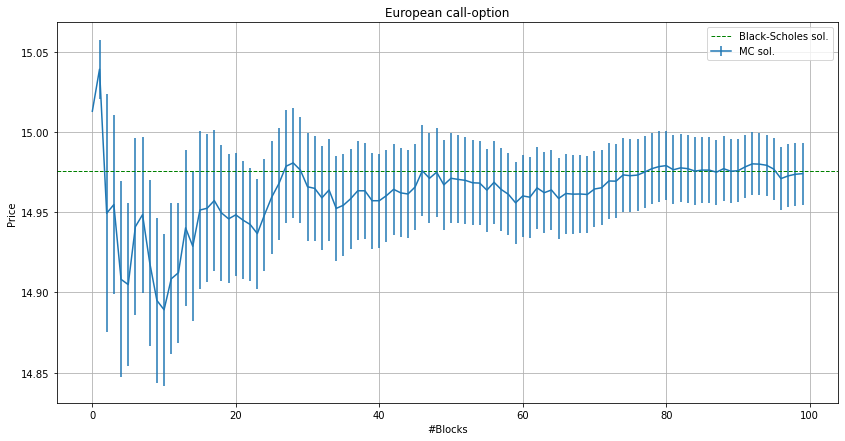

In [20]:
N = 100 # Number of blocks
prog_average_call_profit = np.loadtxt("../results/EX03_1(3).dat", usecols=0)
prog_error_call_profit = np.loadtxt("../results/EX03_1(3).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_call_profit, yerr=prog_error_call_profit, label='MC sol.')
plt.axhline(y=14.976, label='Black-Scholes sol.', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European call-option')
plt.xlabel('#Blocks')
plt.ylabel('Price')
plt.grid(True)

plt.show()

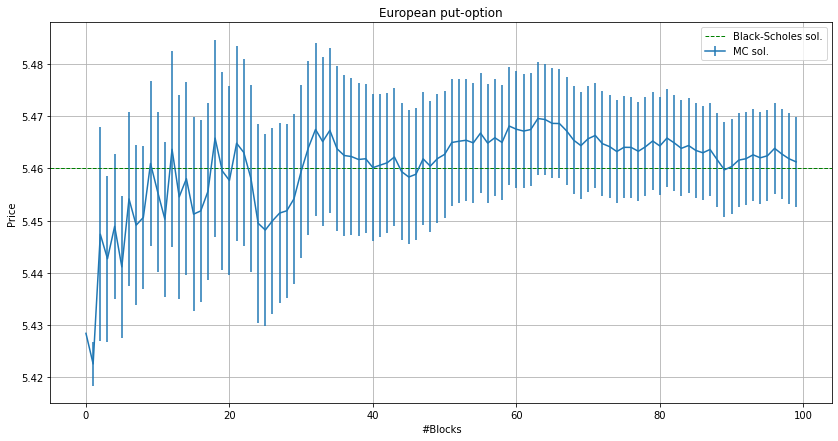

In [23]:
N = 100 # Number of blocks
prog_average_put_profit = np.loadtxt("../results/EX03_1(4).dat", usecols=0)
prog_error_put_profit = np.loadtxt("../results/EX03_1(4).dat", usecols=1)
x=np.arange(0,N) 

plt.figure(figsize=(14,7))
plt.errorbar(x, prog_average_put_profit, yerr=prog_error_put_profit, label='MC sol.')
plt.axhline(y=5.460, label='Black-Scholes sol.', 
            color='g', linestyle='--',linewidth=1)
plt.legend(loc="upper right")
plt.title('European put-option')
plt.xlabel('#Blocks')
plt.ylabel('Price')
plt.grid(True)

plt.show()